In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
def categorize(score):
    if score < 40:
        return 'Low'
    elif score < 70:
        return 'Medium'
    else:
        return 'High'

In [7]:
data = pd.read_csv("Mall_Customers.csv")

In [8]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
data.columns = ['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore']

In [10]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])  # Male=1, Female=0

In [11]:
data['SpendingCategory'] = data['SpendingScore'].apply(categorize)
data['SpendingCategory'] = le.fit_transform(data['SpendingCategory'])

In [12]:
X = data[['Age', 'AnnualIncome', 'Gender']]
y = data['SpendingCategory']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [40]:
y_pred = dt.predict(X_test)

In [41]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.92      0.75        13
           1       0.94      0.80      0.86        20
           2       1.00      0.89      0.94        27

    accuracy                           0.87        60
   macro avg       0.86      0.87      0.85        60
weighted avg       0.90      0.87      0.87        60



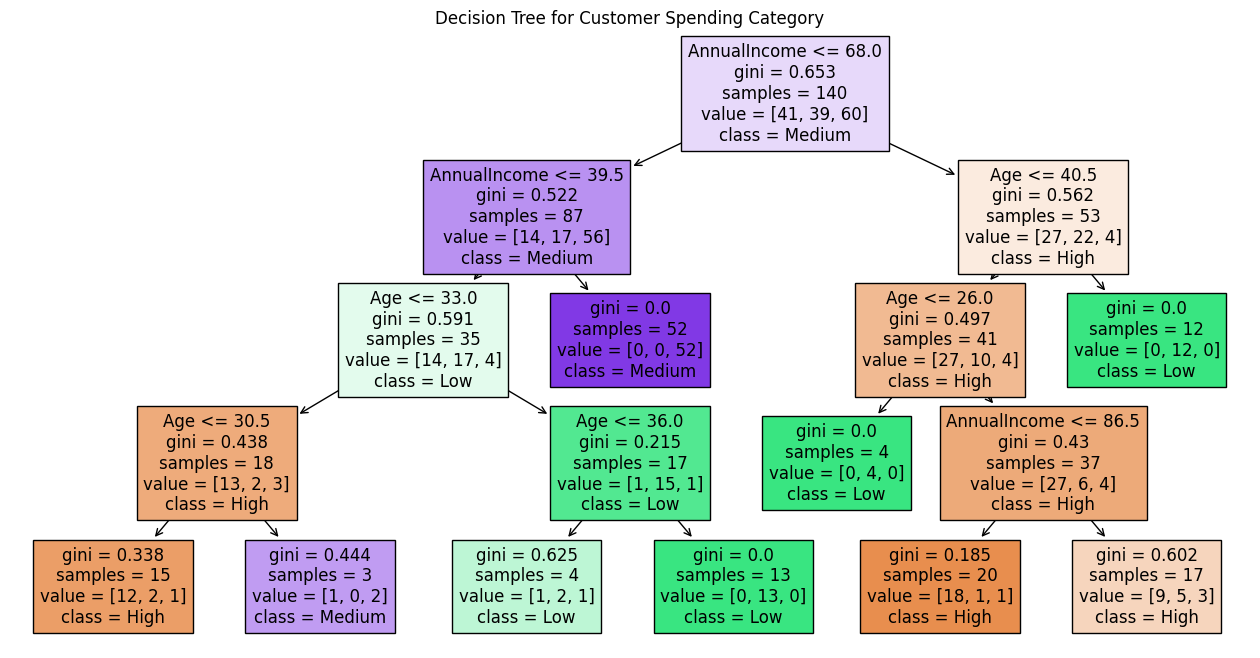

In [43]:
plt.figure(figsize=(16, 8))
plot_tree(dt, feature_names=X.columns.tolist(), class_names=['High', 'Low', 'Medium'], filled=True)
plt.title("Decision Tree for Customer Spending Category")
plt.show()

In [5]:
sns.scatterplot(x=y_pred, data = data)

NameError: name 'y_pred' is not defined